In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [76]:
def plot_error_to_param(params, train_errors, val_errors, param_name):
    fig, ax = plt.subplots(figsize=(4, 4))

    ax.plot(params, train_errors, color='red', marker='o', label='train errors', lw=0.8)
    ax.plot(params, val_errors, color='blue', marker='o', label='val errors', lw=0.8)

    ax.set_title("Error vs " + param_name)
    ax.set_xlabel(param_name)
    ax.set_ylabel('error')
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.show()

In [28]:
def gen_blobs():
    centers = np.array([[-1, 0], [1, 0], [0, 1], [0, -1], [-2, 1], [-2,-1]])
    X, y = make_blobs(n_samples=800, centers=centers, cluster_std=0.4, random_state=2, n_features=2)
    return (X, y)

In [51]:
def custom_accuracy(y: np.array, y_pred: np.array) -> float:
    return np.sum(y != y_pred) / len(y)

In [69]:
def build_complex_model(name: str, regularizer=None):
    return Sequential(
                        [
                            Dense(120, activation='relu', kernel_regularizer=regularizer),
                            Dense(40, activation='relu', kernel_regularizer=regularizer),
                            Dense(6, activation='linear')
                        ], name=name
                    )

Generate data

In [22]:
X, y = gen_blobs()

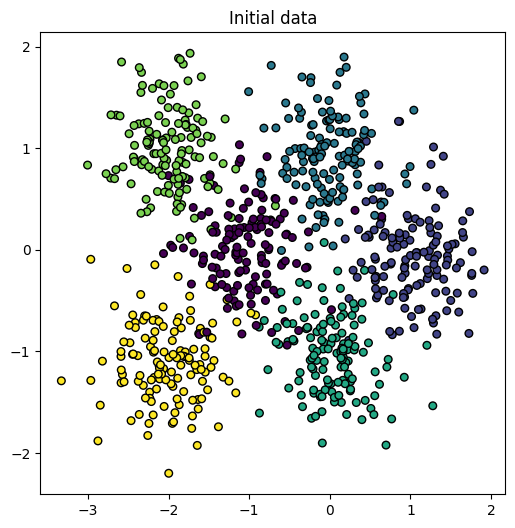

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=30, edgecolor="k")
ax.set_title("Initial data")

plt.show()

Split data

In [19]:
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.6, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)

Generate model

In [35]:
tf.random.set_seed(1234)
model = build_complex_model("complex_model")

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01)
)

In [36]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
15/15 [==============================] - 2s 2ms/step - loss: 0.9313
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3693
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2951
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2589
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2482
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2441
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2610
Epoch 9/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2711
Epoch 10/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2179
Epoch 11/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2336
Epoch 12/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2601
Epoch 13/1000
15/15 [====

In [37]:
model.summary()

Model: "complex_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 120)                 360       
                                                                 
 dense_1 (Dense)             (32, 40)                  4840      
                                                                 
 dense_2 (Dense)             (32, 6)                   246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


Evaluate errors:

In [53]:
model_predictions = model.predict(X_train)
train_probabilities = np.array(tf.nn.softmax(model_predictions))
train_predictions = np.argmax(train_probabilities, axis=1)

train_error = custom_accuracy(y=y_train, y_pred=train_predictions)
print(f'{train_error = }')

15/15 [==============================] - 0s 1ms/step
train_error = 0.004166666666666667


In [54]:
model_predictions = model.predict(X_cv)
cv_probabilities = np.array(tf.nn.softmax(model_predictions))
cv_predictions = np.argmax(cv_probabilities, axis=1)

cv_error = custom_accuracy(y=y_cv, y_pred=cv_predictions)
print(f'{cv_error = }')

5/5 [==============================] - 0s 2ms/step
cv_error = 0.08125


The cv error is much larger. This model has worked very hard to capture outliers of each category for training set. High variance, overfitting.

Simplify the model:

In [55]:
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(6, activation='relu'),
        Dense(6, activation='linear')
    ], name="simple_model"
)
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01)
)

In [56]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
15/15 [==============================] - 1s 2ms/step - loss: 1.6687
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.3897
Epoch 3/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.1838
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.9747
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.7746
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6141
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.4985
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.4145
Epoch 9/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3584
Epoch 10/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3228
Epoch 11/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2992
Epoch 12/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2819
Epoch 13/1000
15/15 [====

In [57]:
model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (32, 6)                   18        
                                                                 
 dense_4 (Dense)             (32, 6)                   42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


Evaluate errors:

In [58]:
model_predictions = model.predict(X_train)
train_probabilities = np.array(tf.nn.softmax(model_predictions))
train_predictions = np.argmax(train_probabilities, axis=1)

train_error = custom_accuracy(y=y_train, y_pred=train_predictions)
print(f'{train_error = }')

15/15 [==============================] - 0s 2ms/step
train_error = 0.07291666666666667


In [59]:
model_predictions = model.predict(X_cv)
cv_probabilities = np.array(tf.nn.softmax(model_predictions))
cv_predictions = np.argmax(cv_probabilities, axis=1)

cv_error = custom_accuracy(y=y_cv, y_pred=cv_predictions)
print(f'{cv_error = }')

5/5 [==============================] - 0s 10ms/step
cv_error = 0.04375


The simple model has a higher classification error on training data, but does better on cv data than the more complex model.

Regularization:

In [70]:
tf.random.set_seed(1234)
model = build_complex_model("regularized_complex_model", l2(0.1))

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01)
)

In [62]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
15/15 [==============================] - 1s 3ms/step - loss: 3.9642
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.4785
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 1.1342
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.9519
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.8824
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.8683
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.8827
Epoch 8/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.8407
Epoch 9/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8068
Epoch 10/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.7535
Epoch 11/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.7199
Epoch 12/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.7044
Epoch 13/1000
15/15 [====

In [63]:
model.summary()

Model: "regularized_complex_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (32, 120)                 360       
                                                                 
 dense_6 (Dense)             (32, 40)                  4840      
                                                                 
 dense_7 (Dense)             (32, 6)                   246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_predictions = model.predict(X_train)
train_probabilities = np.array(tf.nn.softmax(model_predictions))
train_predictions = np.argmax(train_probabilities, axis=1)

train_error = custom_accuracy(y=y_train, y_pred=train_predictions)
print(f'{train_error = }')

15/15 [==============================] - 0s 2ms/step
train_error = 0.075


In [65]:
model_predictions = model.predict(X_cv)
cv_probabilities = np.array(tf.nn.softmax(model_predictions))
cv_predictions = np.argmax(cv_probabilities, axis=1)

cv_error = custom_accuracy(y=y_cv, y_pred=cv_predictions)
print(f'{cv_error = }')

5/5 [==============================] - 0s 3ms/step
cv_error = 0.04375


In [66]:
model_predictions = model.predict(X_test)
test_probabilities = np.array(tf.nn.softmax(model_predictions))
test_predictions = np.argmax(test_probabilities, axis=1)

test_error = custom_accuracy(y=y_test, y_pred=test_predictions)
print(f'{test_error = }')

5/5 [==============================] - 0s 2ms/step
test_error = 0.09375


The simple model is a bit better in the training set than the regularized model but worse in the cross validation set.

Finding optimal regularization value:

In [74]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.1, 0.3]
models = []

train_errors = []
cv_errors = []

In [75]:
for lambda_ in lambdas:
    model = build_complex_model("regularized_complex_model", l2(lambda_))

    model.compile(
        loss=SparseCategoricalCrossentropy(from_logits=True),
        optimizer=Adam(0.01),
    )

    model.fit(
        X_train, y_train,
        epochs=1000
    )

    models.append(model)
    train_errors.append(custom_accuracy(y=y_train, y_pred=np.argmax(np.array(tf.nn.softmax(model.predict(X_train))), axis=1)))
    cv_errors.append(custom_accuracy(y=y_cv, y_pred=np.argmax(np.array(tf.nn.softmax(model.predict(X_cv))), axis=1)))


Epoch 1/1000
15/15 [==============================] - 1s 2ms/step - loss: 1.0067
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3659
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2848
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2494
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2347
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2460
Epoch 8/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2622
Epoch 9/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2642
Epoch 10/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2161
Epoch 11/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2284
Epoch 12/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2591
Epoch 13/1000
15/15 [====

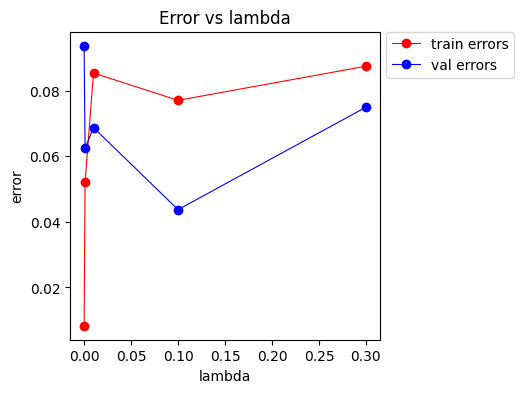

In [77]:
plot_error_to_param(lambdas, train_errors, cv_errors, 'lambda')

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. lambda > 0.001 is a reasonable choice

Test error

In [84]:
model_predictions = models[np.argmin(cv_errors)].predict(X_test)
test_probabilities = np.array(tf.nn.softmax(model_predictions))
test_predictions = np.argmax(test_probabilities, axis=1)

test_error = custom_accuracy(y=y_test, y_pred=test_predictions)
print(f'{test_error = }')

5/5 [==============================] - 0s 2ms/step
test_error = 0.09375
